In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
'''

Fungsi Umum

'''

def funcTrapesium(x,a,b,c,d):
  
  if x<= a or x>=d:
    return 0
  elif a<x and x<b:
    return (x-a)/(b-a)
  elif b<=x and x<=c:
    return 1
  else:
    return -(x-d)/(d-c)

def funcTriangle(x,a,b,c):
  if x<=a or x>=c:
    return 0
  elif a<x and x<=b:
    return (x-a)/(b-a)
  else:
    return -(x-c)/(c-b)

In [ ]:
"""

buat fungsi fuzzy buat makanan

"""

def makananLezat(x):
  return funcTrapesium(x,6,9,10,999)
def makananSedang(x):
  return funcTriangle(x,4,5,8)
def makananKurang(x):
  return funcTrapesium(x,-999,0,3,5)


"""

buat fungsi pelayanan

"""

def pelayananBuruk(x):
  return funcTrapesium(x,-999,0,20,40)

def pelayananCukup(x):
  return funcTrapesium(x,20,40,70,80)

def pelayananBaik(x):
  return funcTrapesium(x,60,75,85,90)

def pelayananSangatBaik(x):
  return funcTrapesium(x,85,90,100,999)

"""

buat fungsi nilai kelayakan

"""
def sangatRendah(x):
  return funcTrapesium(x,-999,0,20,30)

def rendah(x):
  return funcTriangle(x,20,50,60)

def sedang(x):
  return funcTriangle(x,50,70,90)

def tinggi(x):
  return funcTrapesium(x,70,100,999,999)


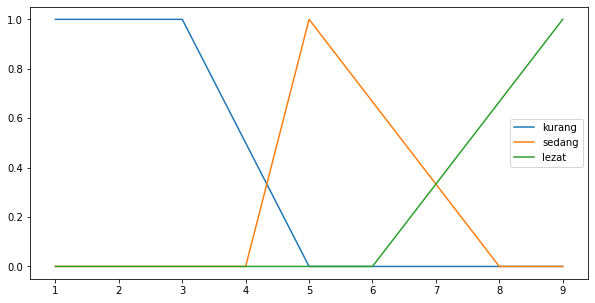

In [ ]:


'''
menampilkan dalam plot makanan
'''

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

x=np.arange(1,10,1)


fungsi=np.vectorize(lambda x :makananKurang(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="kurang")


fungsi=np.vectorize(lambda x :makananSedang(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="sedang")



fungsi=np.vectorize(lambda x :makananLezat(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="lezat")
plt.legend()



plt.show()



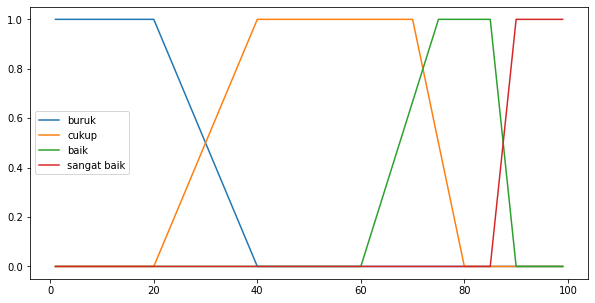

In [ ]:
x=np.arange(1,100,1)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)


fungsi=np.vectorize(lambda x :pelayananBuruk(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="buruk")


fungsi=np.vectorize(lambda x :pelayananCukup(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="cukup")

fungsi=np.vectorize(lambda x :pelayananBaik(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="baik")

fungsi=np.vectorize(lambda x :pelayananSangatBaik(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="sangat baik")

plt.legend()
plt.show()

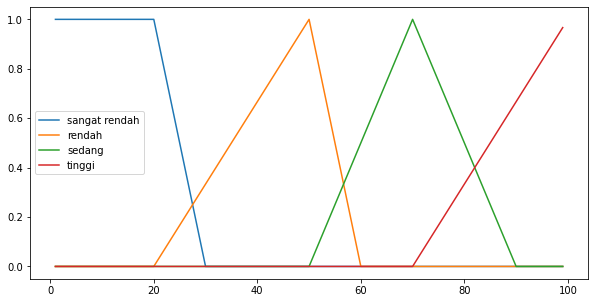

In [ ]:


'''
menampilkan dalam plot kualitas
'''

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

x=np.arange(1,100,1)


fungsi=np.vectorize(lambda x :sangatRendah(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="sangat rendah")


fungsi=np.vectorize(lambda x :rendah(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="rendah")



fungsi=np.vectorize(lambda x :sedang(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="sedang")

fungsi=np.vectorize(lambda x :tinggi(x), otypes=[np.float])
y=fungsi(x)

plt.plot(x,y,label="tinggi")
plt.legend()



plt.show()

                     INFERENSI DAN RULES NILAI KELAYAKAN

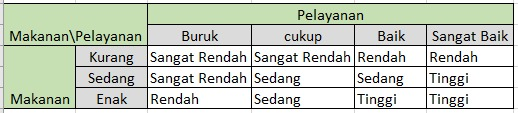

In [ ]:
"""
contoh

makanan = 4                           pelayanan = 70
rendah 0.3  sedang 0.7                rendah=0 sedang=0.2   baik  0.8  sangat baik= 0
 [0.3,0.7,0]                          [0,0.2,0.8,0]
 nolMakanan = [2]                      NolPelayanan=[0,3]
idxmaxmakanan=[0,1]               idxmaxpelayanan=[1,2]
"""

In [ ]:
# INFERENSI

def rules(x,y):

  """
  output di sesuaikan dengan aturan diatas
  """

  if x==0 and y==0:
    return 0
  elif x==1 and y==0:
    return 0
  elif x==2 and y==0:
    return 1
  elif x==3 and y==0:
    return 1
  elif x==0 and y==1:
    return 0
  elif x==1 and y==1:
    return 2
  elif x==2 and y==1:
    return 2
  elif x==3 and y==1:
    return 3
  elif x==0 and y==2:
    return 1
  elif x==1 and y==2:
    return 2  
  elif x==2 and y==2:
    return 3 
  elif x==3 and y==2:
    return 3

def directoryMakanan(x):
  if x==0:
    return "kurang"
  elif x==1:
    return "sedang"
  elif x==2:
    return "lezat"
  
def directoryPelayanan(x):
  if x==0:
    return "buruk"
  elif x==1:
    return "cukup"
  elif x==2:
    return "baik"
  elif x==3:
    return "sangat baik"

def directoryKualitas(x):
  if x==0:
    return "Sangat Rendah"
  elif x==1:
    return "Rendah"
  elif x==2:
    return "Sedang"
  elif x==3:
    return "Tinggi"

def inference(makanan,pelayanan):
 
  arrHasil=np.array([0,0,0,0],dtype=float)

  #periksa nilai 0 pada array
  nolMakanan=np.where(makanan == 0)[0]
  nolPelayanan=np.where(pelayanan == 0 )[0]
  

  if np.size(nolPelayanan)<=2:          #jika pelayanan  >1 nilai
        idxMaxPelayan = (-pelayanan).argsort()[:2]      #ambil 2 terbesar 
        if np.size(nolMakanan)<=1:            #jika makanan nya >1 nilai
            idxMaxMakanan = (-makanan).argsort()[:2] 
            for i in idxMaxPelayan:              
                for j in idxMaxMakanan:   
                  print(f"makanan {directoryMakanan(j)} ({makanan[j]}) pelayanan {directoryPelayanan(i)} ({pelayanan[i]}) rulesnya {directoryKualitas(rules(i,j))} ({min(pelayanan[i],makanan[j])})")
                  if arrHasil[rules(i,j)] < min(pelayanan[i],makanan[j]):
                      arrHasil[rules(i,j)]= min(pelayanan[i],makanan[j])
                     


        else:                      #jika makanan nilai =1
          idxMaxMakanan= (-makanan).argsort()[:1] #ambil yang punya nilai terbesar
          for i in idxMaxPelayan:        
            for j in idxMaxMakanan:
              print(f"makanan {directoryMakanan(j)} ({makanan[j]}) pelayanan {directoryPelayanan(i)} ({pelayanan[i]}) rulesnya {directoryKualitas(rules(i,j))} ({min(pelayanan[i],makanan[j])})")
              if arrHasil[rules(i,j)] < min(pelayanan[i],makanan[j]): 
                      arrHasil[rules(i,j)]= min(pelayanan[i],makanan[j])
                      


  else: #jika pelayanan nilainya =1
        idxMaxPelayan = (-pelayanan).argsort()[:1]

        if np.size(nolMakanan)<=1:            #jika makanan nilai nya  >1
          idxMaxMakanan = (-makanan).argsort()[:2]
          for i in idxMaxPelayan:              
            for j in range(len(makanan)):   
              print(f"makanan {directoryMakanan(j)} ({makanan[j]}) pelayanan {directoryPelayanan(i)} ({pelayanan[i]}) rulesnya {directoryKualitas(rules(i,j))} ({min(pelayanan[i],makanan[j])})")
              if arrHasil[rules(i,j)] < min(pelayanan[i],makanan[j]): 
                      arrHasil[rules(i,j)]= min(pelayanan[i],makanan[j])


        else: #jika makanan nilai nya  =1
          idxMaxMakanan=  (-makanan).argsort()[:1] #ambil yang punya nilai terbesar
          for i in idxMaxPelayan:        #iterasi
            for j in idxMaxMakanan:
              print(f"makanan {directoryMakanan(j)} ({makanan[j]}) pelayanan {directoryPelayanan(i)} ({pelayanan[i]}) rulesnya {directoryKualitas(rules(i,j))} ({min(pelayanan[i],makanan[j])})")
              if arrHasil[rules(i,j)] < min(pelayanan[i],makanan[j]): 
                      arrHasil[rules(i,j)]= min(pelayanan[i],makanan[j])
    
  
  return arrHasil


In [ ]:
"""

buat fungsi untuk mengaplikasikan aturan fuzzy

"""

def fuzzification(x,y):
  #ambil nilai
  resMakananLezat = round(makananLezat(x),2)
  resMakananSedang = round(makananSedang(x),2)
  resMakananKurang = round(makananKurang(x),2)

  resPelayananBuruk= round(pelayananBuruk(y),2)
  resPelayananCukup= round(pelayananCukup(y),2)
  resPelayananBaik= round(pelayananBaik(y),2)
  resPelayananSangatBaik= round(pelayananSangatBaik(y),2)

  #nilainya dimasukan di array dengan format sesuai index
  arrMakanan=np.array([resMakananKurang,resMakananSedang,resMakananLezat])
  arrPelayanan=np.array([resPelayananBuruk,resPelayananCukup,resPelayananBaik,resPelayananSangatBaik])

  print(f"makanan = {x}, pelayanan = {y}")
  print(f"array makanan = {arrMakanan}, array pelayanan = {arrPelayanan}")
  hasilInference=inference(arrMakanan,arrPelayanan)
  print(f"hasil")
  print(f"NK = {directoryKualitas(0)} ({hasilInference[0]})")
  print(f"NK = {directoryKualitas(1)} ({hasilInference[1]})")
  print(f"NK = {directoryKualitas(2)} ({hasilInference[2]})")
  print(f"NK = {directoryKualitas(3)} ({hasilInference[3]})")
  

  return hasilInference

In [ ]:
def defuSugeno(sgtRendah,rendah,sedang,tinggi):
  n = 0
  o = 0
  if sgtRendah != 0:
    n = n + sgtRendah*20
    o = o + sgtRendah
  if rendah != 0:
    n = n + rendah*50
    o = o + rendah
  if sedang != 0:
    n = n + sedang*70
    o = o + sedang   
  if tinggi != 0:
    n = n + tinggi*100
    o = o + tinggi 
  print(f"maka dihasilkan {n/o} \n\n ")
  return n/o


Main program


In [ ]:
import pandas as pd
!gdown --id 15fdNY34wDU1nuZzU9-Xq2RJu5T3DNFWA
df=pd.read_excel('restoran.xlsx')

Downloading...
From: https://drive.google.com/uc?id=15fdNY34wDU1nuZzU9-Xq2RJu5T3DNFWA
To: /content/restoran.xlsx
100% 10.5k/10.5k [00:00<00:00, 8.59MB/s]


In [ ]:
#main program
arrHasil=np.array([])
rendah=np.array([])
tinggi=np.array([])
for i, r in df.iterrows():
    NK=fuzzification(r.makanan,r.pelayanan)
    hasil=defuSugeno(NK[0],NK[1],NK[2],NK[3])
    arrHasil=np.append(arrHasil,hasil)
   
   

  
tambahan=pd.Series(data=arrHasil)
df=pd.concat([df, tambahan], axis=1)
df=df.rename(columns={0:'hasil'})



makanan = 7, pelayanan = 58
array makanan = [0.   0.33 0.33], array pelayanan = [0 1 0 0]
makanan kurang (0.0) pelayanan cukup (1) rulesnya Sangat Rendah (0.0)
makanan sedang (0.33) pelayanan cukup (1) rulesnya Sedang (0.33)
makanan lezat (0.33) pelayanan cukup (1) rulesnya Sedang (0.33)
hasil
NK = Sangat Rendah (0.0)
NK = Rendah (0.0)
NK = Sedang (0.33)
NK = Tinggi (0.0)
maka dihasilkan 70.0 

 
makanan = 1, pelayanan = 54
array makanan = [1 0 0], array pelayanan = [0 1 0 0]
makanan kurang (1) pelayanan cukup (1) rulesnya Sangat Rendah (1)
hasil
NK = Sangat Rendah (1.0)
NK = Rendah (0.0)
NK = Sedang (0.0)
NK = Tinggi (0.0)
maka dihasilkan 20.0 

 
makanan = 2, pelayanan = 98
array makanan = [1 0 0], array pelayanan = [0 0 0 1]
makanan kurang (1) pelayanan sangat baik (1) rulesnya Rendah (1)
hasil
NK = Sangat Rendah (0.0)
NK = Rendah (1.0)
NK = Sedang (0.0)
NK = Tinggi (0.0)
maka dihasilkan 50.0 

 
makanan = 4, pelayanan = 52
array makanan = [0.5 0.  0. ], array pelayanan = [0 1 0 0]


In [ ]:
#untuk mendapatkan 10 besar
output=df.copy()
output=output.sort_values(by=['hasil'],ascending=False)
output=output.reset_index()
output=output[['id','pelayanan','makanan','hasil']]
output.head(10)

,id,pelayanan,makanan,hasil
0,42,94,10,100.000000
1,24,100,9,100.000000
2,79,87,9,100.000000
3,69,86,10,100.000000
4,22,79,9,97.272727
5,70,78,8,93.103448
6,31,74,9,88.235294
7,63,78,7,85.000000
8,83,69,8,84.173228
9,95,63,8,76.896552


In [ ]:
idOutput=output['id']
idOutput=idOutput[:10]
idOutput.to_excel("peringkat.xlsx",index=False) 

In [ ]:
print(idOutput)

0    42
1    24
2    79
3    69
4    22
5    70
6    31
7    63
8    83
9    95
Name: id, dtype: int64
